 **➡️Install Required Packages**

In [1]:
!pip install pandas numpy matplotlib scikit-learn statsmodels tensorflow keras --quiet

 **➡️Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

 **➡️Load Data & Simulate Time Series Index**

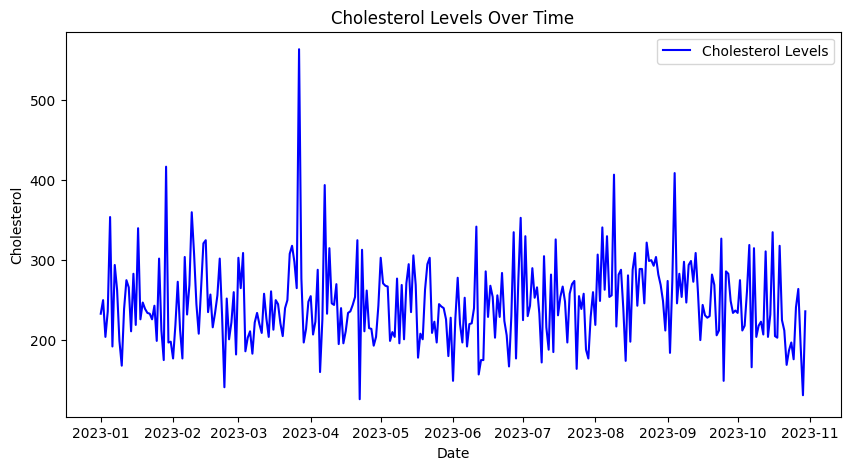

In [3]:
# Load dataset
df = pd.read_csv("/content/Healthcare_Diagnosis_Heart.csv")

# Create a time index (assuming daily patient visits)
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Select a column for time series analysis (e.g., cholesterol 'chol')
series = df['chol']

# Plot original series
plt.figure(figsize=(10, 5))
plt.plot(series, label='Cholesterol Levels', color='blue')
plt.xlabel('Date')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Levels Over Time')
plt.legend()
plt.show()

# **🌸METHOD 1: Decomposition**

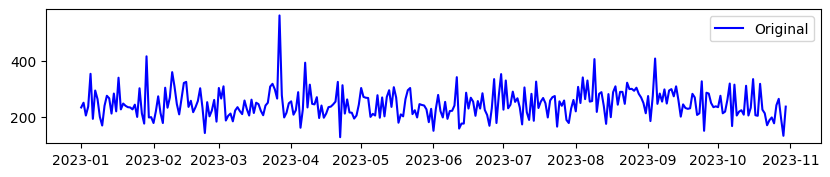

In [4]:
# Perform decomposition
decomposition = seasonal_decompose(series, model='additive', period=30)

# Plot decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(series, label='Original', color='blue')
plt.legend()

**➡️Component 1: Trend**

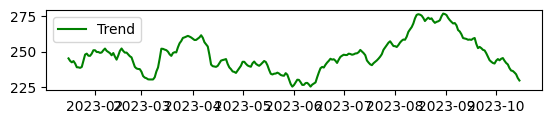

In [5]:
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend()

**➡️Component 2: Seasonality**

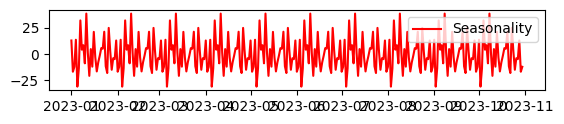

In [6]:
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='red')
plt.legend()

In [14]:
# Create a DataFrame to display decomposition results
decomposition_df = pd.DataFrame({
    'Original': series,
    'Seasonality': decomposition.seasonal,
})

# Display first 10 rows of decomposition results
print(decomposition_df.head(10))

            Original  Seasonality
date                             
2023-01-01       233    12.913747
2023-01-02       250   -16.782549
2023-01-03       204   -12.097364
2023-01-04       236    13.617451
2023-01-05       354   -30.926994
2023-01-06       192   -13.473290
2023-01-07       294    31.982265
2023-01-08       263     4.160043
2023-01-09       199     8.441525
2023-01-10       168    -8.778846


**➡️Component 3: Noise**

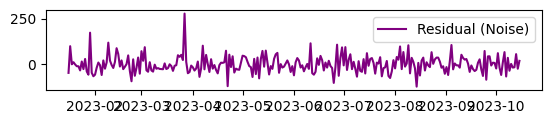

In [7]:
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual (Noise)', color='purple')
plt.legend()

# **🌸METHOD 2: Smoothing**

            Original  Exp_Moving_Avg
date                                
2023-01-01       233      233.000000
2023-01-02       250      236.090909
2023-01-03       204      230.256198
2023-01-04       236      231.300526
2023-01-05       354      253.609521
2023-01-06       192      242.407790
2023-01-07       294      251.788192
2023-01-08       263      253.826702
2023-01-09       199      243.858211
2023-01-10       168      230.065809


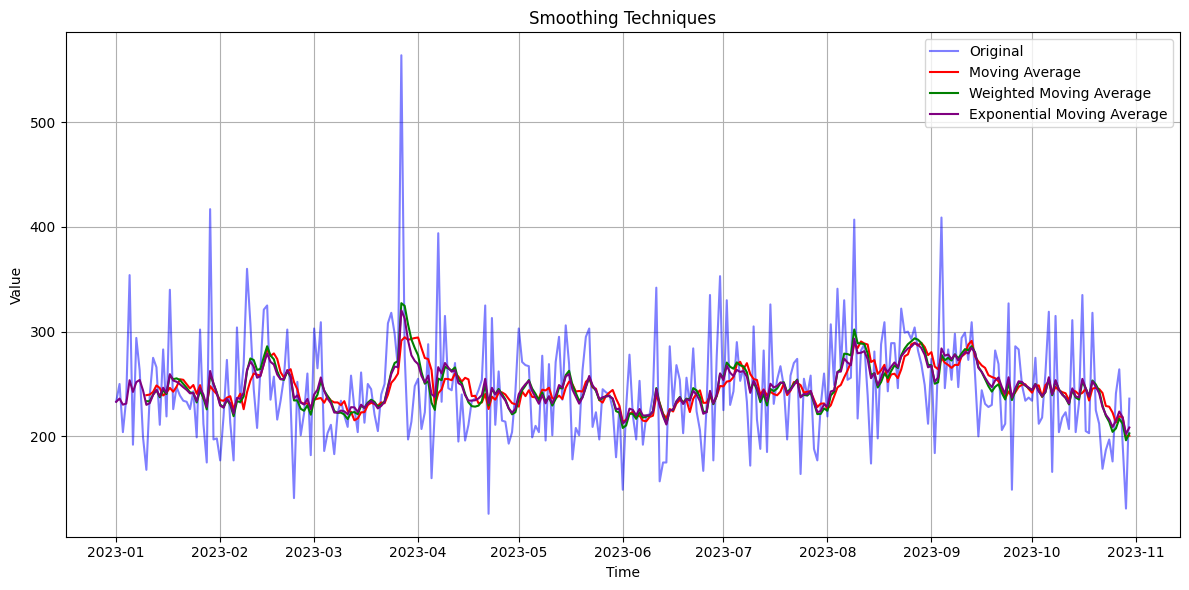

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define window size
window_size = 10

# Moving Average (Simple)
moving_avg = series.rolling(window=window_size).mean()

# Weighted Moving Average
weights = np.arange(1, window_size + 1)
weighted_moving_avg = series.rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Exponential Moving Average
exp_moving_avg = series.ewm(span=window_size, adjust=False).mean()

# Create a DataFrame to display smoothing results
smoothing_df = pd.DataFrame({
    'Original': series,
    'Exp_Moving_Avg': exp_moving_avg
})

# Display first 10 rows
print(smoothing_df.head(10))

# Plot smoothing results
plt.figure(figsize=(12, 6))

plt.plot(series, label='Original', color='blue', alpha=0.5)
plt.plot(moving_avg, label='Moving Average', color='red')
plt.plot(weighted_moving_avg, label='Weighted Moving Average', color='green')
plt.plot(exp_moving_avg, label='Exponential Moving Average', color='purple')

plt.legend()
plt.title('Smoothing Techniques')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.tight_layout()
plt.show()

**➡️Type 1: Simple Moving Average**

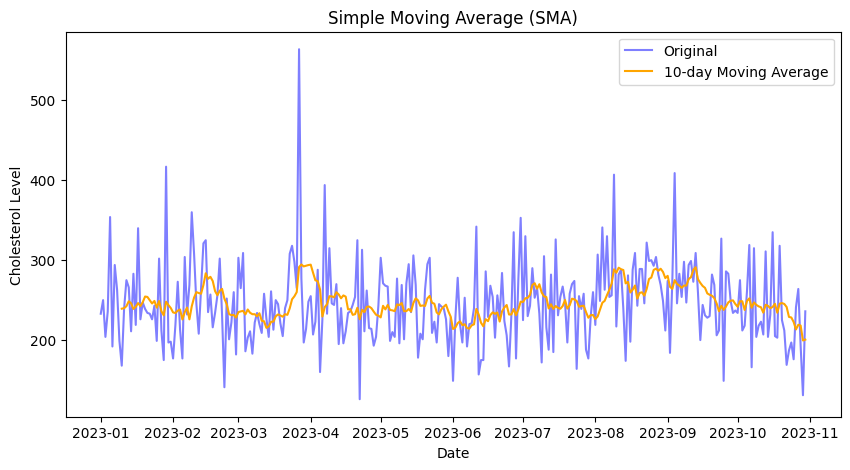

In [10]:
window_size = 10  # Define window size
df['SMA'] = series.rolling(window=window_size).mean()

# Plot SMA
plt.figure(figsize=(10,5))
plt.plot(series, label="Original", color='blue', alpha=0.5)
plt.plot(df['SMA'], label=f'{window_size}-day Moving Average', color='orange')
plt.xlabel("Date")
plt.ylabel("Cholesterol Level")
plt.title("Simple Moving Average (SMA)")
plt.legend()
plt.show()

**➡️Type 2: Weighted Moving Average**

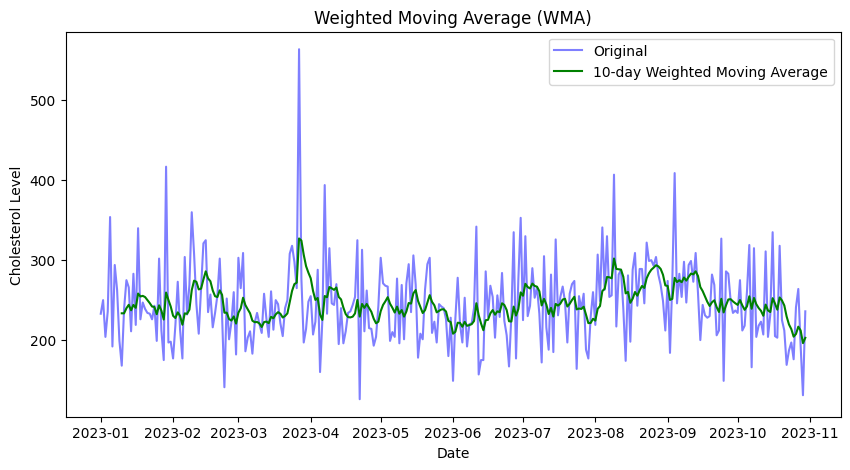

In [11]:
weights = np.arange(1, window_size + 1)  # Increasing weights
df['WMA'] = series.rolling(window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Plot WMA
plt.figure(figsize=(10,5))
plt.plot(series, label="Original", color='blue', alpha=0.5)
plt.plot(df['WMA'], label=f'{window_size}-day Weighted Moving Average', color='green')
plt.xlabel("Date")
plt.ylabel("Cholesterol Level")
plt.title("Weighted Moving Average (WMA)")
plt.legend()
plt.show()

**➡️Type 3: Exponential Moving Average**

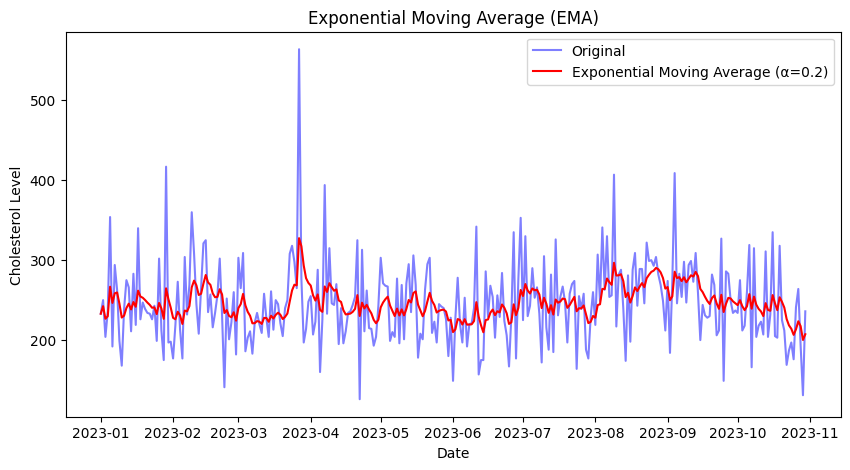

In [12]:
alpha = 0.2  # Smoothing factor
df['EMA'] = series.ewm(alpha=alpha).mean()

# Plot EMA
plt.figure(figsize=(10,5))
plt.plot(series, label="Original", color='blue', alpha=0.5)
plt.plot(df['EMA'], label=f'Exponential Moving Average (α={alpha})', color='red')
plt.xlabel("Date")
plt.ylabel("Cholesterol Level")
plt.title("Exponential Moving Average (EMA)")
plt.legend()
plt.show()